# Guía de Sistemas Discretos: Ejercicio 09
## Análisis de Señales y Sistemas Digitales

### Grupo 2
* Francois, Matías
* Gaytan, Joaquín Oscar
* Kammann, Lucas Agustín
* Maselli, Carlos Javier
* Trozzo, Rafael Nicolás

---------------------------------

![title](ejercicio_9.png)

## Ecuación en diferencias del sistema de tiempo discreto
Analizando el sistema, buscamos la ecuación en diferencias para determinar el comportamiento del mismo. Para simplificar notación de los resultados, se asume tiempo de muestreo $T = 1$.

\begin{equation}
    y(n) = 0.5 \cdot x(n-2) + \alpha \cdot y(n-1) + \beta \cdot y(n-2)
\end{equation}

Finalmente, se utiliza Python para escribir una función que caracterize a este sistema para cada instante ante una dada entrada, para lo cual se asume que el sistema se encuentra relajado por lo cual sus condiciones iniciales para los instantes $y(-2) = y(-1) = 0$ son nulas. Además, de la ecuación se puede observar que el sistema es de tiempo invariante dado el caracter constante de sus coeficientes, lineal y causal dado que sólo se fija en instantes previos de $n \epsilon N$.

In [6]:
from numpy import ndarray, int32

def system(x: callable, alpha: float, beta: float) -> callable:
    """
    La función del sistema crea una función evaluable como el resultado de aplicarle el sistema
    a una determinada entrada.
    :param x: Señal de tiempo discreto de entrada, como función evaluable
    :param alpha: Primer parámetro del sistema
    :param beta: Segundo parámetro del sistema
    :return: Devuelve una función evaluable en un conjunto del tiempo discreto
    """
    def output(domain: list) -> float:
        values = []
        for index, n in enumerate(range(-2, domain[-1] + 1)):
            if n < 0:
                value = 0
            else:
                value = 0.5 * x(n - 2) + alpha * values[index - 1] + beta * values[index - 2]
            values.append(value)
        return values[len(values)-len(domain):]
    return output

def impulse(domain: list or int) -> float:
    """
    Implementación trivial del impulso unitario de tiempo discreto.
    :param domain: Dominio donde se evalua
    :return: Valor de la señal
    """
    if type(domain) == list or type(domain) == ndarray:
        return [1 if n == 0 else 0 for n in domain]
    elif type(domain) == int or type(domain) == int32:
        return 1 if domain == 0 else 0

def step(domain: list or int) -> float:
    """
    Implementación trivial del escalón unitario de tiempo discreto.
    :param domain: Dominion donde se evalua
    :return: Valor de la señal
    """
    if type(domain) == list or type(domain) == ndarray:
        return [1 if n >= 0 else 0 for n in domain]
    elif type(domain) == int or type(domain) == int32:
        return 1 if domain >= 0 else 0

In [7]:
from matplotlib import pyplot
from numpy import arange

pyplot.rcParams["figure.figsize"] = (16,7)

def plot_exercise(input_signal: callable, start: int, stop: int, alpha: int, beta: int, title: str):
    # Cálculo de entrada a salida
    output_signal = system(input_signal, alpha, beta)

    # Gráficos de las señales resultantes
    n_domain = arange(start, stop + 1, 1)

    fig, (ax1, ax2) = pyplot.subplots(1, 2)
    fig.suptitle(title, fontsize=20)
    
    ax1.stem(n_domain, input_signal(n_domain), 'r', markerfmt='r.', label="x(n)", use_line_collection=True)
    ax1.set_title("Señal de entrada $x(n)$")
    ax1.legend()
    ax1.minorticks_on()
    ax1.grid(which='both')

    ax2.stem(n_domain, output_signal(n_domain), 'g', markerfmt='g.', label="y(n)", use_line_collection=True)
    ax2.set_title("Señal de salida $y(n)$")
    ax2.legend()
    ax2.minorticks_on()
    ax2.grid(which='both')

### Caso 1
$\alpha = 1$ y $\beta = -\frac{1}{2}$

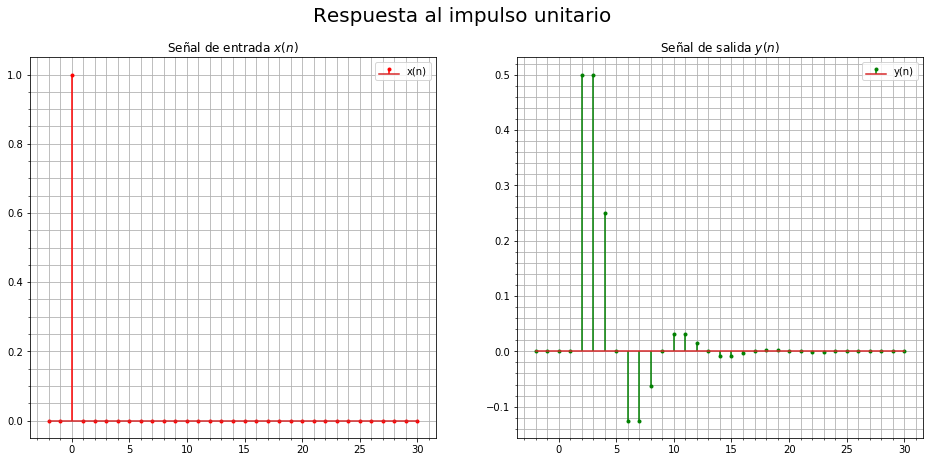

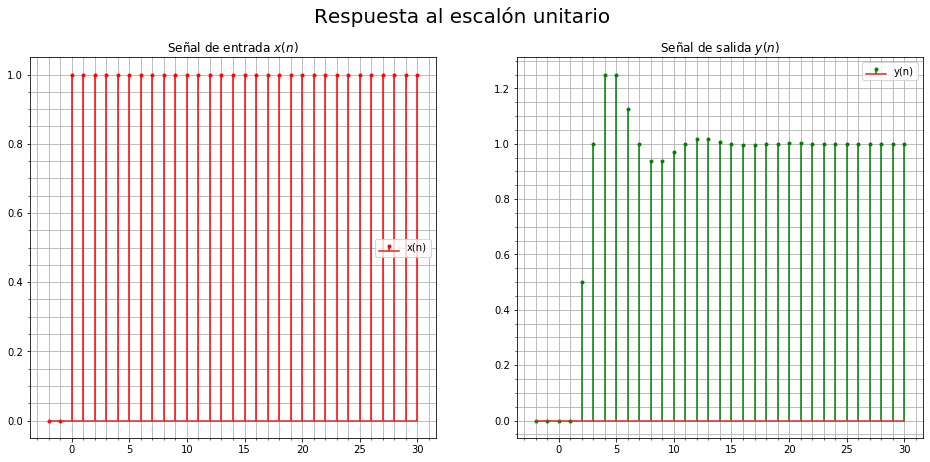

In [8]:
plot_exercise(impulse, -2, 30, 1, -0.5, "Respuesta al impulso unitario")
plot_exercise(step, -2, 30, 1, -0.5, "Respuesta al escalón unitario")

### Caso 2
$\alpha = \frac{1}{2}$ y $\beta = -\frac{1}{8}$

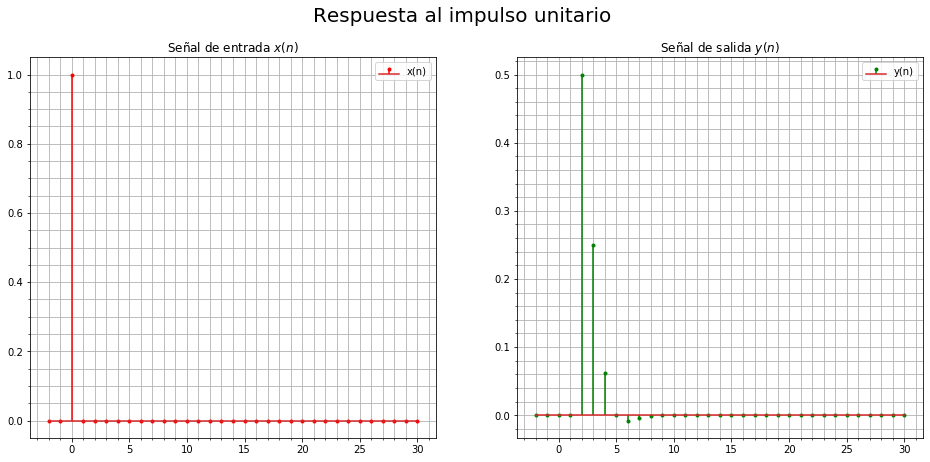

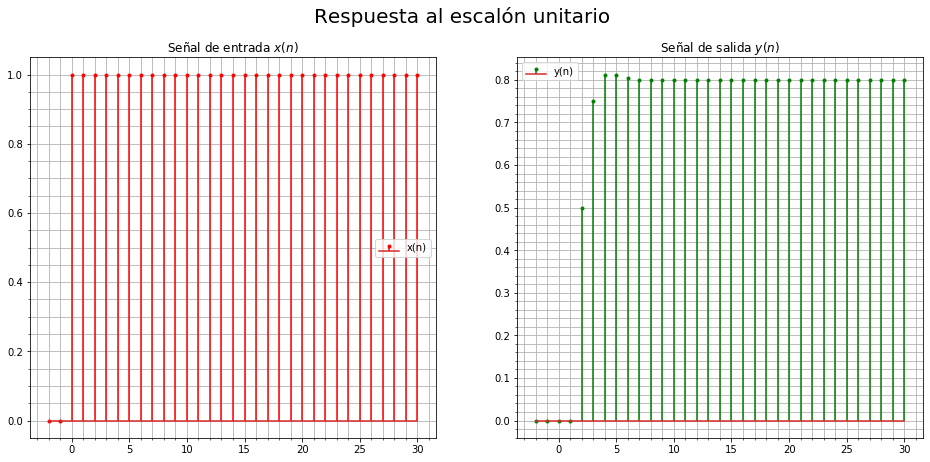

In [9]:
plot_exercise(impulse, -2, 30, 1/2, -1/8, "Respuesta al impulso unitario")
plot_exercise(step, -2, 30, 1/2, -1/8, "Respuesta al escalón unitario")

### Caso 3
$\alpha = \frac{5}{4}$ y $\beta = -\frac{25}{32}$

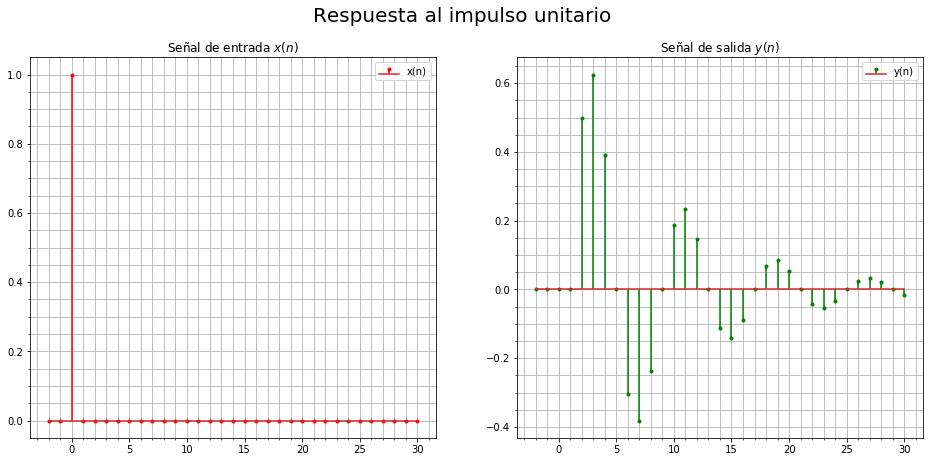

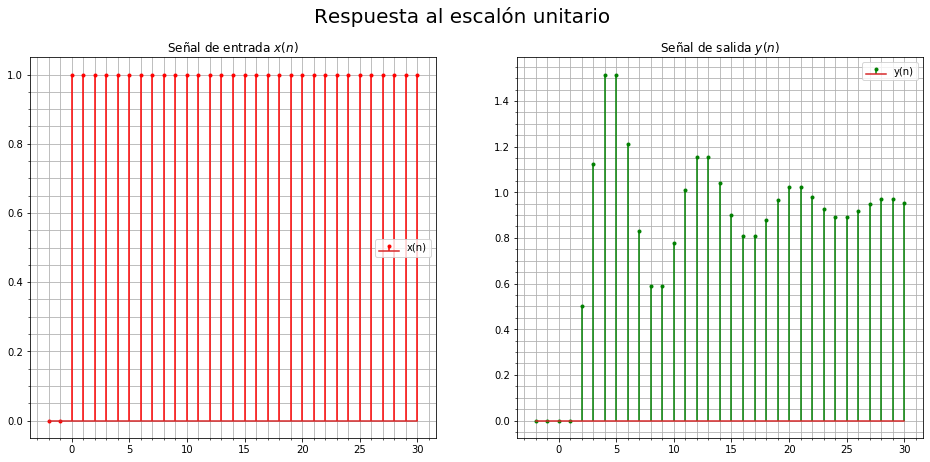

In [10]:
plot_exercise(impulse, -2, 30, 5/4, -25/32, "Respuesta al impulso unitario")
plot_exercise(step, -2, 30, 5/4, -25/32, "Respuesta al escalón unitario")

Para cada uno de los casos se puede observar la respuesta de un sistema de segundo orden, lo cual era evidente por la forma característica de la ecuación a diferencias que lo describe, con lo cual acorde a sus coeficientes será el tipo de respuesta al impulso y al escalón, donde particularmente en estos casos se hablaría de sistemas subamortiguados que presentan oscilaciones durante la estabilización en el tiempo transitorio, y para cada uno de esos casos se puede definir una frecuencia de oscilación amortiguada.

<table style='font-family:"Courier New", Courier, monospace; font-size:200%'>
    <tr>
        <td>Casos</td>
        <td>Caso 1</td>
        <td>Caso 2</td>
        <td>Caso 3</td>
    </tr>
        <td>$f_n$</td>
        <td>$\frac{1}{8}$</td>
        <td>$\frac{1}{8}$</td>
        <td>$\frac{1}{8}$</td>
    <tr>
    </tr>
</table>